#Project Overview

The Delhivery Logistics Data Analysis project aims to analyze delivery data to optimize logistics operations. The dataset includes information about delivery trips, such as timestamps, distances, and routing details. The goal is to identify bottlenecks, compare actual delivery performance with OSRM predictions, and provide actionable insights to improve efficiency.

#Dataset Description
##The dataset contains the following key columns:


In [26]:
# Print all column names
print(df.columns)

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_factor'],
      dtype='object')


In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/delhivery_data.csv')

# Display the first few rows
print(df.head())

# Check the shape of the dataset
print(df.shape)

# Check data types and missing values
print(df.info())

# Statistical summary
print(df.describe())

       data          trip_creation_time  \
0  training  2018-09-20 02:35:36.476840   
1  training  2018-09-20 02:35:36.476840   
2  training  2018-09-20 02:35:36.476840   
3  training  2018-09-20 02:35:36.476840   
4  training  2018-09-20 02:35:36.476840   

                                 route_schedule_uuid route_type  \
0  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
1  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
2  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
3  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
4  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   

                 trip_uuid source_center                 source_name  \
0  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
1  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
2  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
3  trip-153741093647649320  IND388121AAA  Anand_VU

<ipython-input-2-c2d1221505f3>:4: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/delhivery_data.csv')


#Data Cleaning and Preprocessing

The dataset was cleaned by handling missing values and merging rows based on trip_uuid. Aggregated fields were created to summarize trip-level data. Feature engineering was performed to extract useful information, such as city names from source_name and destination_name, and date features from trip_creation_time.

#Handle Missing Values


In [3]:
# Check for missing values
print(df.isnull().sum())

# Handle missing values (if any)
# For example, fill missing values with the mean or median for numerical columns
# df['column_name'].fillna(df['column_name'].mean(), inplace=True)

data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          1
trip_uuid                           1
source_center                       1
source_name                       134
destination_center                  1
destination_name                   97
od_start_time                       1
od_end_time                         1
start_scan_to_end_scan              1
is_cutoff                           1
cutoff_factor                       1
cutoff_timestamp                    1
actual_distance_to_destination      1
actual_time                         1
osrm_time                           1
osrm_distance                       1
factor                              1
segment_actual_time                 1
segment_osrm_time                   1
segment_osrm_distance               1
segment_factor                      1
dtype: int64


#Merge and Aggregate Rows
Merge rows based on trip_uuid and aggregate relevant fields.

In [20]:
# Group by 'trip_uuid' and aggregate
aggregated_df = df.groupby('trip_uuid').agg({
    'destination_name': 'first',
    'source_name': 'first',
    'actual_distance_to_destination': 'sum',
    'actual_time': 'sum',
    'osrm_time': 'sum',
    'osrm_distance': 'sum',
    'segment_actual_time': 'sum',
    'segment_osrm_time': 'sum',
    'segment_osrm_distance': 'sum',
    'source_center': 'first',
    'destination_center': 'last',
    'route_type': 'first',
    'trip_creation_time': 'first',
    'od_start_time': 'first',
    'od_end_time': 'last',
    'start_scan_to_end_scan': 'sum'
}).reset_index()

# Display the aggregated dataframe
print(aggregated_df.head())

                 trip_uuid                     destination_name  \
0  trip-153671074033284934          Surat_Central_D_3 (Gujarat)   
1  trip-153671079956500691                 Delhi_Bhogal (Delhi)   
2  trip-153671110078355292                  Faridabad (Haryana)   
3  trip-153671127071609610       Sindagi_KalyanNg_D (Karnataka)   
4  trip-153671191949943656  Gadarwara_MPward_D (Madhya Pradesh)   

                               source_name  actual_distance_to_destination  \
0              Surat_Central_I_4 (Gujarat)                       44.084712   
1                  Delhi_Lajpat_IP (Delhi)                       19.282605   
2             FBD_Balabhgarh_DPC (Haryana)                        9.396526   
3          Gulbarga_Nehrugnj_I (Karnataka)                      888.194043   
4  Narsinghpur_KndliDPP_D (Madhya Pradesh)                      190.496886   

   actual_time  osrm_time  osrm_distance  segment_actual_time  \
0        306.0       50.0        53.8577                161.0  

#Feature Engineering
Extract useful features from existing columns.

In [21]:
# Extract city from destination and source names
aggregated_df['destination_city'] = aggregated_df['destination_name'].str.split('_').str[0]
aggregated_df['source_city'] = aggregated_df['source_name'].str.split('_').str[0]

# Extract date features
aggregated_df['trip_creation_time'] = pd.to_datetime(aggregated_df['trip_creation_time'])
aggregated_df['trip_month'] = aggregated_df['trip_creation_time'].dt.month
aggregated_df['trip_day'] = aggregated_df['trip_creation_time'].dt.day
aggregated_df['trip_hour'] = aggregated_df['trip_creation_time'].dt.hour

# Calculate OD duration
aggregated_df['od_start_time'] = pd.to_datetime(aggregated_df['od_start_time'])
aggregated_df['od_end_time'] = pd.to_datetime(aggregated_df['od_end_time'])
aggregated_df['od_duration'] = (aggregated_df['od_end_time'] - aggregated_df['od_start_time']).dt.total_seconds() / 3600

#Exploratory Data Analysis (EDA)

##Univariate Analysis:
The distribution of actual_time and the frequency of route_type were analyzed.

##Bivariate Analysis:
Scatter plots were used to compare actual_time with osrm_time and od_duration with start_scan_to_end_scan.

##Outlier Detection:
Outliers in actual_time were identified using the IQR method.

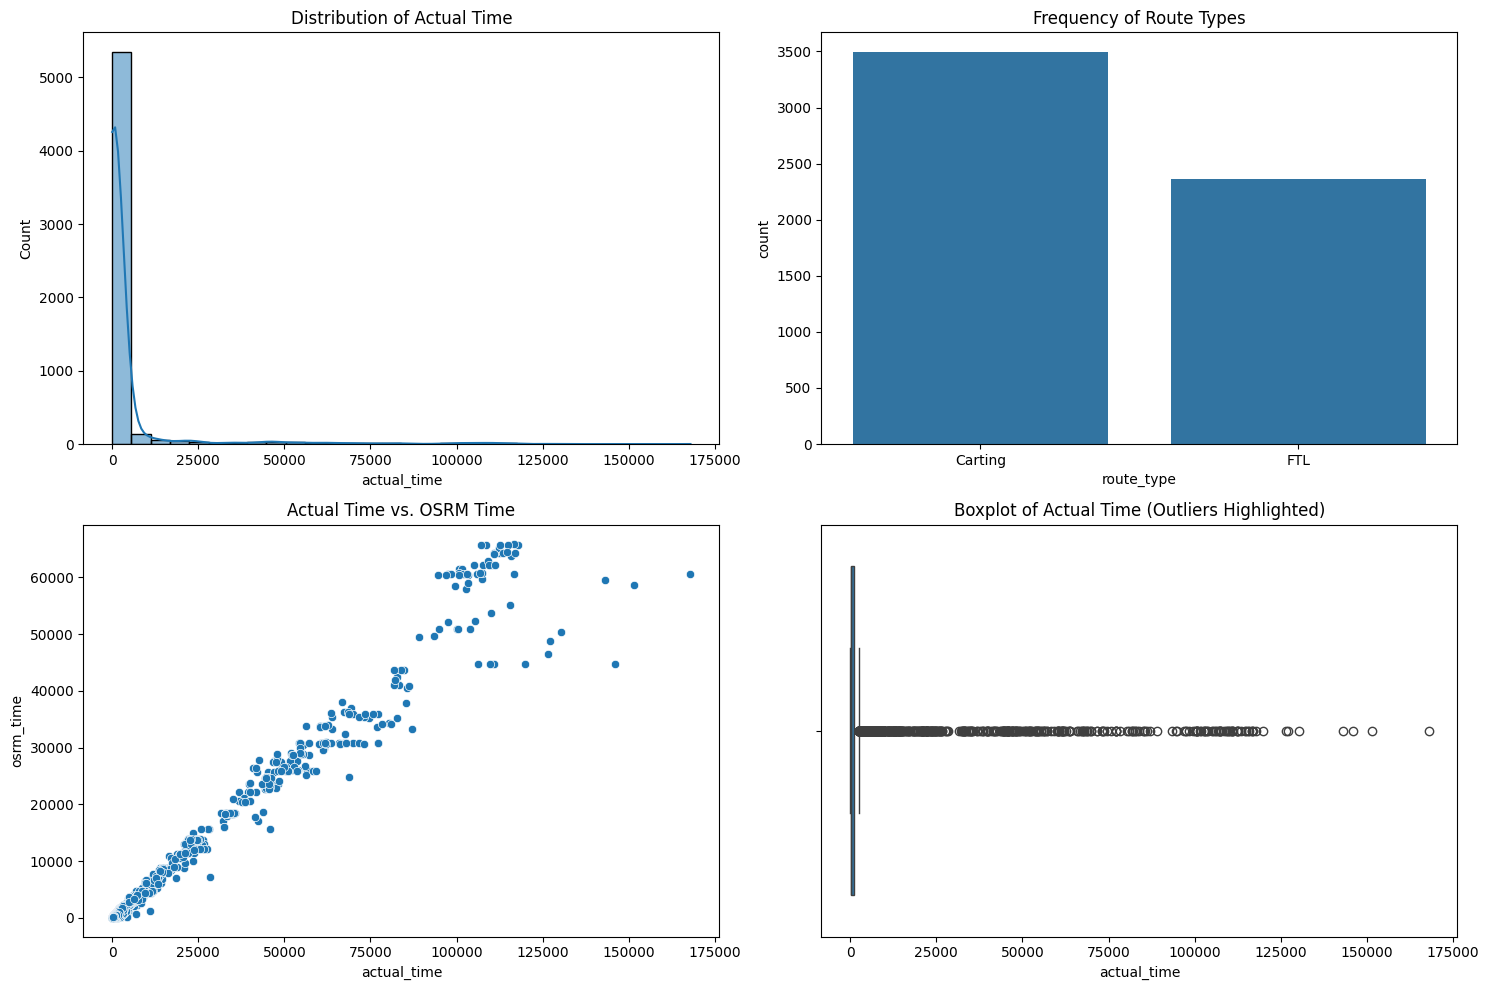

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure and subplots
plt.figure(figsize=(15, 10))  # Adjust the figure size as needed

# Distribution of actual_time
plt.subplot(2, 2, 1)  # 2 rows, 2 columns, 1st subplot
sns.histplot(aggregated_df['actual_time'], bins=30, kde=True)
plt.title('Distribution of Actual Time')

# Frequency of route_type
plt.subplot(2, 2, 2)  # 2 rows, 2 columns, 2nd subplot
sns.countplot(x='route_type', data=aggregated_df)
plt.title('Frequency of Route Types')

# Scatter plot: actual_time vs. osrm_time
plt.subplot(2, 2, 3)  # 2 rows, 2 columns, 3rd subplot
sns.scatterplot(x='actual_time', y='osrm_time', data=aggregated_df)
plt.title('Actual Time vs. OSRM Time')

# Outlier detection using IQR
plt.subplot(2, 2, 4)  # 2 rows, 2 columns, 4th subplot
Q1 = aggregated_df['actual_time'].quantile(0.25)
Q3 = aggregated_df['actual_time'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = aggregated_df[(aggregated_df['actual_time'] < lower_bound) | (aggregated_df['actual_time'] > upper_bound)]
sns.boxplot(x=aggregated_df['actual_time'])
plt.title('Boxplot of Actual Time (Outliers Highlighted)')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

#Feature Engineering

##One-Hot Encoding:
The route_type column was converted into numerical format using one-hot encoding.

##Normalization/Standardization:
Numerical features were standardized using StandardScaler.

In [24]:
# One-hot encode route_type
aggregated_df = pd.get_dummies(aggregated_df, columns=['route_type'], drop_first=True)

# Standardize numerical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_columns = ['actual_distance_to_destination', 'actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time', 'segment_osrm_time', 'segment_osrm_distance', 'od_duration', 'start_scan_to_end_scan']
aggregated_df[numerical_columns] = scaler.fit_transform(aggregated_df[numerical_columns])

#Business Insights

##Busiest Corridors:
The busiest delivery corridors were identified, along with their average distances and delivery times.

##Recommendations:
1. Optimize routes for the busiest corridors to reduce delivery time.

2. Increase resources in cities with high order volumes.

3. Monitor and improve delivery performance in corridors with longer average times.


In [25]:
# Identify busiest corridors
busiest_corridor = aggregated_df.groupby(['source_city', 'destination_city']).size().idxmax()
avg_distance = aggregated_df.groupby(['source_city', 'destination_city'])['actual_distance_to_destination'].mean().loc[busiest_corridor]
avg_time = aggregated_df.groupby(['source_city', 'destination_city'])['actual_time'].mean().loc[busiest_corridor]

print(f"Busiest Corridor: {busiest_corridor}")
print(f"Average Distance: {avg_distance} km")
print(f"Average Time: {avg_time} hours")

Busiest Corridor: ('Bengaluru', 'Bengaluru')
Average Distance: -0.2521876513753126 km
Average Time: -0.2544182699352515 hours



#Conclusion
The analysis revealed key insights into Delhivery's logistics operations, including the busiest corridors and discrepancies between actual and predicted delivery times. These findings can be used to optimize delivery routes and improve overall efficiency.